In [2]:
# import warnings filter
from warnings import simplefilter 
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
#import modul 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [3]:
#input Data 
df=pd.read_csv('TLKM_JK.csv') 
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/2/2015,2885.0,2885.0,2850.0,2860.0,2430.013428,18992100.0
1,1/5/2015,2850.0,2850.0,2820.0,2835.0,2408.771973,49940700.0
2,1/6/2015,2810.0,2835.0,2800.0,2815.0,2391.778809,47892100.0
3,1/7/2015,2865.0,2870.0,2795.0,2810.0,2387.530518,70076600.0
4,1/8/2015,2840.0,2845.0,2825.0,2835.0,2408.771973,56582500.0
...,...,...,...,...,...,...,...
1720,11/16/2021,3590.0,3680.0,3590.0,3670.0,3670.000000,99590700.0
1721,11/17/2021,3690.0,3690.0,3600.0,3630.0,3630.000000,82023300.0
1722,11/18/2021,3630.0,3640.0,3600.0,3630.0,3630.000000,53290400.0
1723,11/19/2021,3660.0,3920.0,3660.0,3900.0,3900.000000,310615000.0


In [4]:
df.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [5]:
df=df.dropna(how='any', axis=0)

In [6]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
L=len(df) 
print(L)

1724


In [8]:
df['Date']= pd.to_datetime(df.Date)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
df = df.set_index('Date')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,2885.0,2885.0,2850.0,2860.0,2430.013428,18992100.0
2015-01-05,2850.0,2850.0,2820.0,2835.0,2408.771973,49940700.0
2015-01-06,2810.0,2835.0,2800.0,2815.0,2391.778809,47892100.0
2015-01-07,2865.0,2870.0,2795.0,2810.0,2387.530518,70076600.0
2015-01-08,2840.0,2845.0,2825.0,2835.0,2408.771973,56582500.0
...,...,...,...,...,...,...
2021-11-16,3590.0,3680.0,3590.0,3670.0,3670.000000,99590700.0
2021-11-17,3690.0,3690.0,3600.0,3630.0,3630.000000,82023300.0
2021-11-18,3630.0,3640.0,3600.0,3630.0,3630.000000,53290400.0


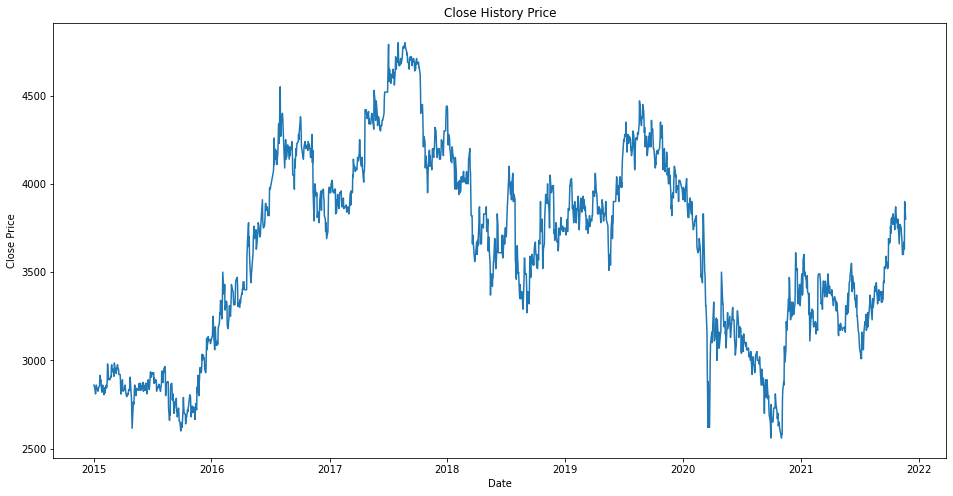

In [10]:
#analisis deskriptif 
plt.figure(figsize=(16,8))
plt.title('Close History Price')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

In [11]:
Y1=np.array([df.iloc[:,4]])

In [12]:
#penentuan variabel dependent dan independent 
X=Y1[:,1:L-3]
print(X) 
Y=Y1[:,2:L-2]
print(Y) 
X=X.reshape(-1,1) 
Y=Y.reshape(-1,1)

[[2408.771973 2391.778809 2387.530518 ... 3600.       3670.
  3630.      ]]
[[2391.778809 2387.530518 2408.771973 ... 3670.       3630.
  3630.      ]]


In [13]:
#preprocessing data 
scaler=MinMaxScaler() 
scaler.fit(X) 
X=scaler.transform(X) 
scaler1 = MinMaxScaler() 
scaler1.fit(Y)
Y = scaler1.transform(Y)
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,shuffle=False, random_state=42)

In [14]:
#analisis svr 
# SVR models
model = SVR(kernel='poly')
linear_svr_clf_feat = model.fit(X_train,y_train) 
y_pred_test=model.predict(X_test) 
y_pred_train=model.predict(X_train)
print('MSE: {0:.3f}'.format(mean_squared_error(y_test, y_pred_test)))
print('MAE: {0:.3f}'.format(mean_absolute_error(y_test, y_pred_test)))
print('R^2: {0:.3f}'.format(r2_score(y_test, y_pred_test)))
print('R^2: {0:.3f}'.format(r2_score(y_train, y_pred_train)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE: 0.007
MAE: 0.076
R^2: 0.702
R^2: 0.784


In [15]:
#nilai MAPE sebelum tuning
def mean_absolute_percentage_error(y_test, y_pred_test):
  y_test, y_pred_test = np.array(y_test),
  np.array(y_pred_test)
  return y_test, y_pred_test
MAPE= np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100
print(MAPE)

42.852350967488


In [16]:
#tuning parameter using grid search 
rbf_svr_parameters = {
    'C':[10, 100, 1000],
    'degree':[1, 2],
}
model_gsc = GridSearchCV(estimator=linear_svr_clf_feat, param_grid=rbf_svr_parameters, cv=5)
clf= model_gsc.fit(X_train, y_train) 
best_params = clf.best_params_ 
Y1_pred_test= model_gsc.predict(X_test) 
Y1_pred_train= model_gsc.predict(X_train) 
best_params
print('MSE: {0:.3f}'.format(mean_squared_error(y_test, Y1_pred_test)))
print('MAE: {0:.3f}'.format(mean_absolute_error(y_test, Y1_pred_test)))
print('R^2: {0:.3f}'.format(r2_score(y_test, Y1_pred_test)))
print('R^2: {0:.3f}'.format(r2_score(y_train, Y1_pred_train)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

MSE: 0.001
MAE: 0.023
R^2: 0.963
R^2: 0.987


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


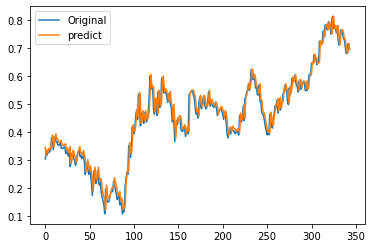

In [17]:
#plot hasil
plt.plot(y_test, label='Original') 
plt.plot(Y1_pred_test, label='predict') 
plt.legend(loc='best')
plt.show()

In [19]:
#denormalisasi data 
Y1_pred_test=Y1_pred_test.reshape(-1, 1) 
print(Y1_pred_test) 
Y1_pred_test_inverse=scaler.inverse_transform(Y1_pred_test) 
y_test_inverse=scaler.inverse_transform(y_test) 
print(Y1_pred_test_inverse)

[[0.34433343]
 [0.31379081]
 [0.33560707]
 [0.32688047]
 [0.33997025]
 [0.33560707]
 [0.3466432 ]
 [0.34205776]
 [0.38791185]
 [0.3787411 ]
 [0.3466432 ]
 [0.3787411 ]
 [0.39249728]
 [0.37415567]
 [0.37415567]
 [0.36498481]
 [0.36039949]
 [0.36498481]
 [0.36957024]
 [0.35122863]
 [0.35122863]
 [0.35122863]
 [0.35581406]
 [0.35581406]
 [0.33288702]
 [0.34205776]
 [0.33288702]
 [0.32371615]
 [0.3466432 ]
 [0.28703293]
 [0.30078911]
 [0.33288702]
 [0.33288702]
 [0.31454541]
 [0.30995998]
 [0.29161825]
 [0.30078911]
 [0.32830159]
 [0.33747245]
 [0.3466432 ]
 [0.32371615]
 [0.32371615]
 [0.31454541]
 [0.33288702]
 [0.31913072]
 [0.30537454]
 [0.25952046]
 [0.27786207]
 [0.30078911]
 [0.27786207]
 [0.25952046]
 [0.27786207]
 [0.25952046]
 [0.23200799]
 [0.1861539 ]
 [0.23659342]
 [0.27327664]
 [0.24576416]
 [0.22742255]
 [0.24117885]
 [0.27327664]
 [0.23659342]
 [0.22283712]
 [0.23200799]
 [0.19991008]
 [0.18156847]
 [0.16781229]
 [0.154056  ]
 [0.12195821]
 [0.20908094]
 [0.17698304]
 [0.16

In [20]:
#nilai MAPE setelah Tuning dan denormalisasi
def mean_absolute_percentage_error(y_test_inverse, Y1_pred_test_inverse):
  y_test_inverse, Y1_pred_test_inverse = np.array(y_test_inverse), np.array(Y1_pred_test_inverse)
  return y_test_inverse, Y1_pred_test_inverse 
MAPE= np.mean(np.abs((y_test_inverse - Y1_pred_test_inverse) / y_test_inverse)) * 100 
print(MAPE)

1.530094145635275


In [21]:
#peramalan
#peramalan 1 periode berikutnya 
X_1 = np.array([Y1_pred_test[-1]]) 
X_1 = X_1.reshape((1,1))
Y_1 = model_gsc.predict(X_1) 
print(Y_1)
#peramalan 2 periode berikutnya 
X_2 = np.array([Y_1])
X_2 = X_2.reshape((1,1))
Y_2 = model_gsc.predict(X_2) 
print(Y_2)
#peramalan 3 periode berikutnya 
X_3 = np.array([Y_2])
X_3 = X_3.reshape((1,1))
Y_3 = model_gsc.predict(X_3) 
print(Y_3)
#peramalan 4 periode berikutnya 
X_4 = np.array([Y_3])
X_4 = X_4.reshape((1,1))
Y_4 = model_gsc.predict(X_4) 
print(Y_4)
#peramalan 5 periode berikutnya 
X_5 = np.array([Y_4])
X_5 = X_5.reshape((1,1))
Y_5 = model_gsc.predict(X_5) 
print(Y_5)
#peramalan 6 periode berikutnya 
X_6 = np.array([Y_5])
X_6 = X_6.reshape((1,1))
Y_6 = model_gsc.predict(X_6) 
print(Y_6)
#peramalan 7 periode berikutnya 
X_7 = np.array([Y_6])
X_7 = X_7.reshape((1,1))
Y_7 = model_gsc.predict(X_7) 
print(Y_7)
#peramalan 8 periode berikutnya 
X_8 = np.array([Y_7])
X_8 = X_8.reshape((1,1))
Y_8 = model_gsc.predict(X_8) 
print(Y_8)
#peramalan 9 periode berikutnya 
X_9 = np.array([Y_8])
X_9 = X_9.reshape((1,1))
Y_9 = model_gsc.predict(X_9) 
print(Y_9)
#peramalan 10 periode berikutnya 
X_10 = np.array([Y_9])
X_10 = X_10.reshape((1,1)) 
Y_10 = model_gsc.predict(X_10) 
print(Y_10)

[0.6989312]
[0.70128319]
[0.70358378]
[0.70583411]
[0.70803526]
[0.71018832]
[0.71229434]
[0.71435433]
[0.71636932]
[0.71834028]


In [22]:
#reshape array 
Y_1=Y_1.reshape(-1,1) 
Y_2=Y_2.reshape(-1,1) 
Y_3=Y_3.reshape(-1,1) 
Y_4=Y_4.reshape(-1,1)
Y_5=Y_5.reshape(-1,1) 
Y_6=Y_6.reshape(-1,1) 
Y_7=Y_7.reshape(-1,1) 
Y_8=Y_8.reshape(-1,1) 
Y_9=Y_9.reshape(-1,1) 
Y_10=Y_10.reshape(-1,1)

In [24]:
#denormalisasi hasil peramalan 
#denormalisasi hasil peramalan
Y_1 = scaler.inverse_transform(Y_1) 
Y_2 = scaler.inverse_transform(Y_2) 
Y_3 = scaler.inverse_transform(Y_3) 
Y_4 = scaler.inverse_transform(Y_4) 
Y_5 = scaler.inverse_transform(Y_5) 
Y_6 = scaler.inverse_transform(Y_6) 
Y_7 = scaler.inverse_transform(Y_7) 
Y_8 = scaler.inverse_transform(Y_8) 
Y_9 = scaler.inverse_transform(Y_9) 
Y_10 = scaler.inverse_transform(Y_10)
print(Y_1,Y_2,Y_3,Y_4,Y_5,Y_6,Y_7,Y_8,Y_9,Y_10)

[[3639.87520563]] [[3644.6515724]] [[3649.32357429]] [[3653.89349169]] [[3658.36355519]] [[3662.7359466]] [[3667.0128001]] [[3671.19620322]] [[3675.28819786]] [[3679.29078133]]
